# Organic Chemical Classification


In [26]:
#Install the all lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_context('talk')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Model
from keras.layers import Dense,Input,Dropout


## load the data


In [2]:
data = pd .read_csv("C:\\Users\\Dell\\Downloads\\musk_csv.csv")
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


## Understanding the data

In [3]:
# Total no of records
print(data.shape)

(6598, 170)


In [4]:
#Number of column in our data
print(data.columns)

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)


In [5]:
# Information about datatypes of columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB
None


### check for data imbalanced or not


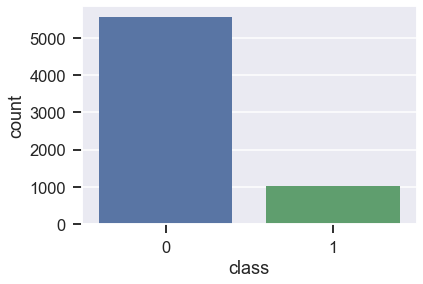

In [6]:
sns.countplot(data['class'])
plt.show()

### The  dataset is imbalanced and class 1 is minority so data must be balanced so we balanced the data later on

NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
NON-MUSK-192      286
NON-MUSK-197      277
MUSK-217          215
NON-MUSK-326      141
NON-MUSK-251      140
NON-MUSK-216      135
NON-MUSK-233      104
NON-MUSK-270       83
MUSK-240           82
MUSK-213           78
MUSK-215           73
MUSK-287           64
NON-MUSK-f209      63
NON-MUSK-jp13      63
NON-MUSK-286       59
NON-MUSK-220       53
NON-MUSK-207       48
MUSK-f158          43
NON-MUSK-244       40
MUSK-f152          36
NON-MUSK-232       34
MUSK-jf67          32
MUSK-212           31
NON-MUSK-249       29
MUSK-256           29
                 ... 
NON-MUSK-jp10       5
NON-MUSK-jf18       4
NON-MUSK-360        4
MUSK-344            4
NON-MUSK-jf79       4
MUSK-321            4
NON-MUSK-296        4
NON-MUSK-332        4
MUSK-jf15           4
NON-MUSK-338        4
NON-MUSK-271        4
NON-MUSK-297        4
NON-MUSK-j83        4
NON-MUSK-j81        4
NON-MUSK-2

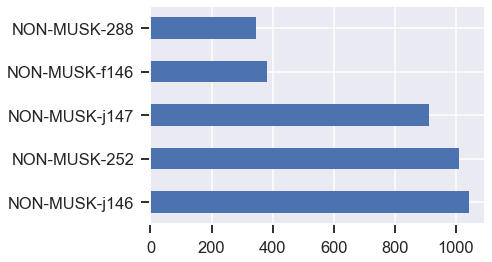

In [7]:
print(data['molecule_name'].value_counts())
data['molecule_name'].value_counts()[:5].plot(kind='barh')

## pre processing

In [8]:
#check for null values
data.isnull().values.any()

False

In [9]:
# check for duplicate record
print('Before check',data.shape)
data =data.drop_duplicates()
print('After Check',data.shape)

Before check (6598, 170)
After Check (6598, 170)


there is no duplicate record

In [10]:
# Split the data into features and label
features = data.drop(['molecule_name', 'conformation_name', 'class'], axis = 1)
label = data['class']

### convert the features in same scale

In [11]:
# Standardized the data features
sc = StandardScaler()
features = sc.fit_transform(features)

In [81]:
features

array([[-1.73178832, -0.24312408,  0.12255207, ..., -0.04561267,
         0.50333227,  0.5762445 ],
       [-1.73126329, -0.33702966, -0.7584422 , ..., -0.24537589,
         0.18759789,  0.39560282],
       [-1.73073827, -0.24312408, -0.82451677, ..., -0.35433764,
         0.06919749, -0.02943645],
       ...,
       [ 1.73073827, -0.28068632,  0.18862664, ..., -0.33617735,
         0.08235309, -0.50760562],
       [ 1.73126329, -0.1492185 , -0.0206095 , ...,  0.06334909,
         0.45070987,  0.79939012],
       [ 1.73178832, -0.1492185 , -0.03162193, ...,  0.06334909,
         0.46386547,  0.8100161 ]])

###  Randomly split the data in 80:20 train and validation data

In [12]:
# Split data into train and test set set
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size = 0.2, random_state = 42)


In [13]:
# shape of train, validate and test dataset
print(f'Shape of train data : {X_train.shape}')
print(f'Shape of validation data : {X_val.shape}')

Shape of train data : (5278, 167)
Shape of validation data : (1320, 167)


In [18]:
# OverSampling on train data to get rid of class imbalance problem
from imblearn.over_sampling import SMOTE
sm = SMOTE(1.0, random_state = 42)
X_train, y_train = sm.fit_sample(X_train, y_train)

print(f'Shape of train data after applying sampling technique : {X_train.shape}')

Shape of train data after applying sampling technique : (8940, 167)


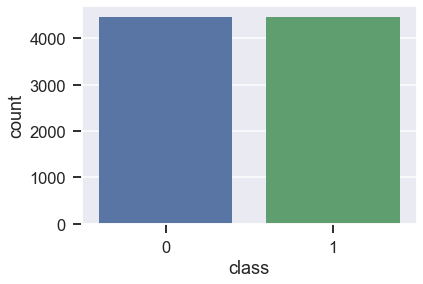

In [19]:
# lets check the label columns after applying sampling tehnique
sns.countplot(y_train)
plt.show()

### After sampling , rid of the ubalanced data

In [65]:
# Build the Multi-layer perceptron model (ANN)
in_layer = Input(shape=[167])
dense_2 = Dense(90, activation="relu")(in_layer)
drop = Dropout(rate=.25)(dense_2)
dense_3 = Dense(30, activation="relu")(drop)
dense_4 = Dense(10,activation="relu")(dense_3)
out = Dense(1, activation="sigmoid")(dense_4)

In [66]:
model = Model(inputs=[in_layer], outputs=[out])

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 167)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 90)                15120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 90)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 30)                2730      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 18,171
Trainable params: 18,171
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [79]:
X_train.shape

(8940, 167)

In [80]:
y_train.shape

(8940,)

In [69]:
hist = model.fit(X_train, y_train, epochs=10,validation_data=(X_val,y_val))

Train on 8940 samples, validate on 1320 samples
Epoch 1/10
8940/8940 [==============================] - 1s 129us/step - loss: 0.1884 - acc: 0.9190 - val_loss: 0.0449 - val_acc: 0.9841
Epoch 2/10
8940/8940 [==============================] - 0s 55us/step - loss: 0.0263 - acc: 0.9916 - val_loss: 0.0153 - val_acc: 0.9947
Epoch 3/10
8940/8940 [==============================] - 0s 56us/step - loss: 0.0119 - acc: 0.9953 - val_loss: 0.0057 - val_acc: 0.9977
Epoch 4/10
8940/8940 [==============================] - 1s 58us/step - loss: 0.0098 - acc: 0.9970 - val_loss: 0.0024 - val_acc: 0.9992
Epoch 5/10
8940/8940 [==============================] - 1s 57us/step - loss: 0.0070 - acc: 0.9975 - val_loss: 0.0142 - val_acc: 0.9955
Epoch 6/10
8940/8940 [==============================] - 0s 56us/step - loss: 0.0086 - acc: 0.9968 - val_loss: 9.6578e-04 - val_acc: 1.0000
Epoch 7/10
8940/8940 [==============================] - 1s 56us/step - loss: 0.0046 - acc: 0.9981 - val_loss: 7.5051e-04 - val_acc: 1.000

In [70]:
h = hist.history

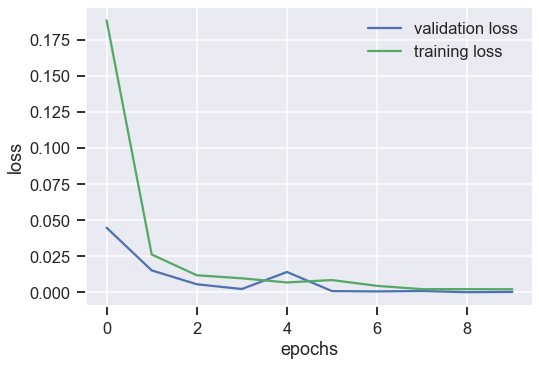

In [71]:
plt.plot(h['val_loss'],label = "validation loss")
plt.plot(h['loss'],label = "training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

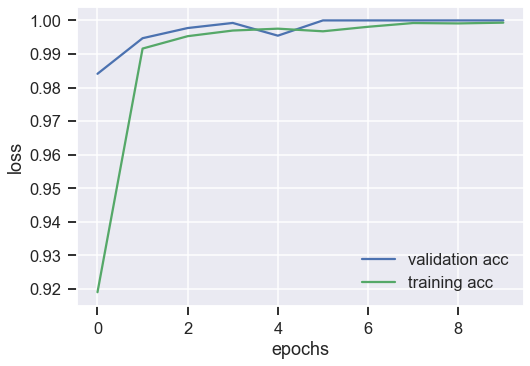

In [72]:
plt.plot(h['val_acc'],label = "validation acc")
plt.plot(h['acc'],label = "training acc")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [82]:

# predictions given by our model on validation data
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)   # set a threshold of 0.5

## final performance of a model

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [83]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [84]:

# Classification report 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00       209

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



In [85]:

# save the weights of the model
model.save_weights('musk.h5')

'push' is not recognized as an internal or external command,
operable program or batch file.
